In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1635


<Axes: xlabel='Time'>

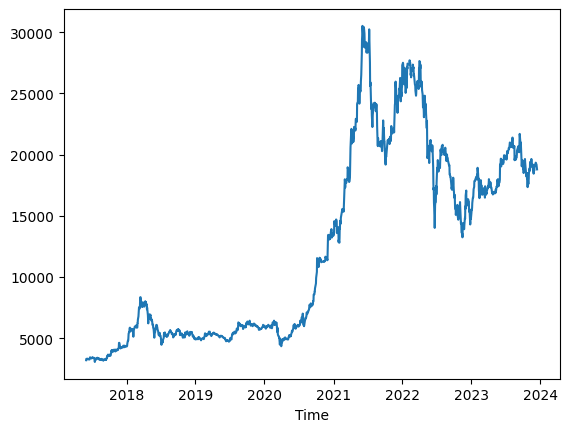

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
VIB['Lag'] = np.arange(len(VIB.index))
VIB = VIB[['Close', 'Lag']]
VIB

VIB = pd.DataFrame(VIB)
VIB.set_index("Lag", inplace= True)
VIB

,Close
Lag,
0,3210
1,3320
2,3290
3,3320
4,3340
...,...
1630,19200
1631,19200
1632,19050


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(VIB))
test_size = int(0.3 * len(VIB))

train_data = VIB[:train_size]
test_data = VIB[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[19154.20148028],
       [19171.30913364],
       [19188.416787  ],
       [19205.52444037],
       [19222.63209373],
       [19239.73974709],
       [19256.84740046],
       [19273.95505382],
       [19291.06270718],
       [19308.17036054],
       [19325.27801391],
       [19342.38566727],
       [19359.49332063],
       [19376.60097399],
       [19393.70862736],
       [19410.81628072],
       [19427.92393408],
       [19445.03158745],
       [19462.13924081],
       [19479.24689417],
       [19496.35454753],
       [19513.4622009 ],
       [19530.56985426],
       [19547.67750762],
       [19564.78516099],
       [19581.89281435],
       [19599.00046771],
       [19616.10812107],
       [19633.21577444],
       [19650.3234278 ],
       [19667.43108116],
       [19684.53873453],
       [19701.64638789],
       [19718.75404125],
       [19735.86169461],
       [19752.96934798],
       [19770.07700134],
       [19787.1846547 ],
       [19804.29230807],
       [19821.39996143],


In [7]:
# 6. 60 days prediction
last_index =  VIB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[27554.05928142]
 [27571.16693478]
 [27588.27458814]
 [27605.38224151]
 [27622.48989487]
 [27639.59754823]
 [27656.70520159]
 [27673.81285496]
 [27690.92050832]
 [27708.02816168]
 [27725.13581505]
 [27742.24346841]
 [27759.35112177]
 [27776.45877513]
 [27793.5664285 ]
 [27810.67408186]
 [27827.78173522]
 [27844.88938859]
 [27861.99704195]
 [27879.10469531]
 [27896.21234867]
 [27913.32000204]
 [27930.4276554 ]
 [27947.53530876]
 [27964.64296213]
 [27981.75061549]
 [27998.85826885]
 [28015.96592221]
 [28033.07357558]
 [28050.18122894]
 [28067.2888823 ]
 [28084.39653566]
 [28101.50418903]
 [28118.61184239]
 [28135.71949575]
 [28152.82714912]
 [28169.93480248]
 [28187.04245584]
 [28204.1501092 ]
 [28221.25776257]
 [28238.36541593]
 [28255.47306929]
 [28272.58072266]
 [28289.68837602]
 [28306.79602938]
 [28323.90368274]
 [28341.01133611]
 [28358.11898947]
 [28375.22664283]
 [28392.3342962 ]
 [28409.44194956]
 [28426.54960292]
 [28443.65725628]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 6330.067950294663
Testing MAPE: 31.713314180047558
Testing MAE: 5913.123652103486
MSLR:  0.09043703127289417


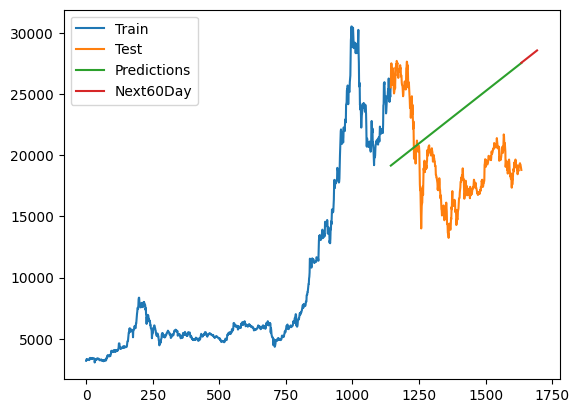

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()